## Workshop 3: This notebook analyzes data for pricing optimization from an A/B test targeting conversion rates for an app. 

### Three main questions are addressed:
1) At which price should the company list their software? <br>
2) What attributes of customer behavior influence conversion rate? <br>
3) How long should the experiment have taken? <br>

### The results are summarized below:

<span class="mark">1) Although the company can obtain higher conversion rate with lower price(39) rather than 59,the revenue gain between these two price settings is quite narrower(0.14) per product.Hence, the company should charge their customers at a higher prices to optimize revenue and profits.</div><br></span>
<br>


<span class="mark">2) As for this problem.The experiment belows mainly focus on 3 different factors(source,device and operative system). As for the source, the top 5 source mainly stems from friend_referral,seo(bing and google) and ads(google and face book).The company place some important market strategies on these sources. As for the device system, the difference between mobile and web is quite small(0.5%). Hence, we ignore this factor. As for the operative system,mac and ios conversion is quite high while windows and android is much lower which not exceed 2%. Hence, the company should invest more strategies in the apple product market.<br>
<br></span>

<span class="mark">3) From the power analysis,5 days(0.14 months) should the experiment.However, I would recommend 2 weeks due to variations in user activity based on day of the week.</span></span>

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# read in data
test_results = pd.read_csv("Assignment 1 2022 test_results.csv")
user_table = pd.read_csv("Assignment 1 2022 user_table.csv")

### Check data for any abnormalities or missing values

In [3]:
test_results.head()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0


In [4]:
user_table.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [5]:
# inspect the test data
test_results = test_results.drop("Unnamed: 0", axis=1)
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0


In [6]:
# inspect the users table
user_table.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [7]:
#the statistics information about user_table
user_table.describe()

,user_id,lat,long
count,275616.000000,275616.000000,275616.000000
mean,499245.801521,37.111680,-93.981772
std,288533.458944,5.209627,18.086486
min,3.000000,19.700000,-157.800000
25%,249544.500000,33.660000,-112.200000
50%,498861.000000,37.740000,-88.930000
75%,748856.500000,40.700000,-78.910000
max,999999.000000,61.180000,30.310000


In [8]:
user_table["city"].value_counts()

New York       25748
Chicago         7153
Houston         6706
San Antonio     4633
Los Angeles     4141
               ...  
Costa Mesa         1
Cerritos           1
East Lake          1
Ocala              1
New Milford        1
Name: city, Length: 923, dtype: int64

<span class="mark">Most of people would like to use their software in the economic development New York or the other cities such as Chicago.</span>

In [9]:
# inspect data types for test results
print("Entries in test results table:", test_results.shape[0])
print("")
test_results.info()

#reivew for the summary
test_results.describe()

Entries in test results table: 316800

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           316800 non-null  int64  
 1   timestamp         316466 non-null  object 
 2   source            316488 non-null  object 
 3   device            316800 non-null  object 
 4   operative_system  296461 non-null  object 
 5   test              316800 non-null  int64  
 6   price             316800 non-null  float64
 7   converted         316800 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 19.3+ MB


,user_id,test,price,converted
count,316800.000000,316800.000000,3.168000e+05,316800.000000
mean,499281.341840,0.360079,6.457590e+06,0.018333
std,288591.154044,0.480024,6.797307e+07,0.134154
min,3.000000,0.000000,3.900000e+01,0.000000
25%,249525.750000,0.000000,3.900000e+01,0.000000
50%,499021.500000,0.000000,3.900000e+01,0.000000
75%,749025.500000,1.000000,5.900000e+01,0.000000
max,1000000.000000,1.000000,9.998843e+08,1.000000


316800 total entries. There are missing values for the timestamp, source, and operative system variables.

In [10]:
#check whether there is some missing values in them
print(test_results.isnull().sum())
print("Total null values is",test_results.isnull().sum())

# number of null values for timestamp,source and operative system
print("timestamp null values is", test_results.timestamp.isnull().sum())
print("source null values is", test_results.source.isnull().sum())
print("OS null values is", test_results.operative_system.isnull().sum())

user_id                 0
timestamp             334
source                312
device                  0
operative_system    20339
test                    0
price                   0
converted               0
dtype: int64
Total null values is user_id                 0
timestamp             334
source                312
device                  0
operative_system    20339
test                    0
price                   0
converted               0
dtype: int64
timestamp null values is 334
source null values is 312
OS null values is 20339


In [11]:
#check if there is some duplicated id
test_results[test_results.duplicated(['user_id'], keep=False)]

,user_id,timestamp,source,device,operative_system,test,price,converted


In [12]:
# inspect data types for user table
print("Entries in user table:", user_table.shape[0])
print("")
user_table.info()

Entries in user table: 275616

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  275616 non-null  int64  
 1   city     275616 non-null  object 
 2   country  275616 non-null  object 
 3   lat      275616 non-null  float64
 4   long     275616 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


<span class="mark">Total number of data in test table (316,800) distmatched the user table (275,615).Hence, we need to do further cleaning.</span>

In [13]:
# are there duplicate users in the test results table? --- No, just more users 
print("Number of unique user ids is:", test_results.user_id.nunique())
print("Number of unique user ids is:", user_table.user_id.nunique())

Number of unique user ids is: 316800
Number of unique user ids is: 275616


In [14]:
#conversion rate proportion
test_results.query('converted == 1').count()[0]/test_results.count()[0]

0.018333333333333333

<div class="mark">
There are more users in the test results table than in the users table, and all users in the test results table are unique. This means that not every user in the test results table will appear in the user table.</div><i class="fa fa-lightbulb-o "></i>

## Explore and Clean Data 

I will use the pandas profiling tool to get a snapshot of my data. This is an awesome tool for understanding the distribution of each variable and for finding anything weird in the data set.

In [15]:
# pandas_profiling.ProfileReport(test_results)

From the test results profile: <br>
- I see that most users did not convert. This makes an imbalanced class issue if I attempt to model the data to answer the second question. 
- Operative system has both missing values and inconsistent data formatting that will need to be cleaned up.
- Price has 3076 distinct values when it should only have two. 
- Source is missing data.
- Timestamp has missing data.

In [16]:
# inspect operative systems values
test_results.operative_system.value_counts()

windows    100878
iOS         95352
android     74856
mac         25056
i0S           113
wnddows        98
anroid         79
apple          29
Name: operative_system, dtype: int64

In [17]:
#inspect the device
test_results["device"].value_counts()

mobile    186471
web       130329
Name: device, dtype: int64

In [18]:
#inspect of the price
test_results["price"].value_counts()

39.0           200747
59.0           112979
911925305.0         1
512043675.0         1
700843638.0         1
                ...  
925543266.0         1
659744341.0         1
597987105.0         1
571025721.0         1
621407779.0         1
Name: price, Length: 3076, dtype: int64


<span class="mark">Most prices are unique expcet for 39 and 59.</span>

In [19]:
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0


In [20]:
# fix operative systems values
test_results["operative_system"] = test_results.operative_system.replace({"i0S": "iOS", "wnddows": "windows",
                                   "anroid":"android", "apple":"mac"})

Now, the number of unique values for price should be 2 (39 or 59), but getting 3000+ values.

In [21]:
# inspect number of unique levels of price variable
test_results.price.nunique()

3076

I am choosing to drop the price column for the dataframe. This is because the price column is the equivalent to the test column where 0=39 and 1=59, so it is redundant. Dropping solves the issue.

In [22]:
#check whether price volumn is the same as test like the dummy variable
(test_results["price"]==test_results["test"]).value_counts()

False    316800
dtype: int64

In [23]:
# drop price column
test_results = test_results.drop("price", axis=1)

In [24]:
#let us inspect the test result again
test_results.head()

,user_id,timestamp,source,device,operative_system,test,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,0


The source column is missing values. I’m not sure why this is, so I am going to keep those rows and simply indicate that they are missing data.

In [25]:
#check about the compoments of the source
test_results["source"].value_counts()

direct_traffic     60307
ads-google         59319
ads_facebook       53337
ads_other          29849
seo-google         23160
ads-bing           22851
seo_facebook       21185
friend_referral    20672
seo-other           9250
ads-yahoo           7573
seo-yahoo           6836
seo-bing            2149
Name: source, dtype: int64

In [26]:
#np.where
#三个参数np.where(cond,x,y)：满足条件（cond）输出x，不满足输出y相當於if else

test_results["source"] = np.where(test_results.source.isnull(), "missing", test_results.source)

In [27]:
#inspect the source again
test_results["source"].value_counts()

direct_traffic     60307
ads-google         59319
ads_facebook       53337
ads_other          29849
seo-google         23160
ads-bing           22851
seo_facebook       21185
friend_referral    20672
seo-other           9250
ads-yahoo           7573
seo-yahoo           6836
seo-bing            2149
missing              312
Name: source, dtype: int64

After cleaning, the null value(312) is filled with missing.

### Q1: At which price should the company list their software?

Let’s take a look at how many users converted in each group (39 and  59).

In [28]:
# examine number of converteds for each group
test_results.groupby(["test"])["user_id"].count()

test
0    202727
1    114073
Name: user_id, dtype: int64

<div class="mark">

The result reveals that prices at 39 is more converted than price at 59.However,this result cannot be completely true due to the unequal group sample size. Further exploration and analysis should be used to clear out which price should we use to improve the conversion rate.</div><i class="fa fa-lightbulb-o "></i>

To start, for each pricing group, what proportion of that group bought the software? This is the CONVERSION RATE.

In [29]:
#first inspect not group by test converted rate
test_results["converted"].value_counts()[0]/test_results["converted"].value_counts().sum()

0.9816666666666667

In [30]:
# the converted rate is 1.83% without considering test(price).
test_results["converted"].value_counts()[1]/test_results["converted"].value_counts().sum()

0.018333333333333333

In [31]:
# find the conversion rate with test(price) relationship
conv = test_results.groupby("test").converted.value_counts(normalize=True)
conv

test  converted
0     0            0.980096
      1            0.019904
1     0            0.984457
      1            0.015543
Name: converted, dtype: float64

In [32]:
print("The conversion rate for the $39 group is:", round(conv[0,1]*100,2), "%")
print("The conversion rate for the $59 group is:", round(conv[1,1]*100,2), "%")

The conversion rate for the $39 group is: 1.99 %
The conversion rate for the $59 group is: 1.55 %


The conversion rate for this two tests group is too low.

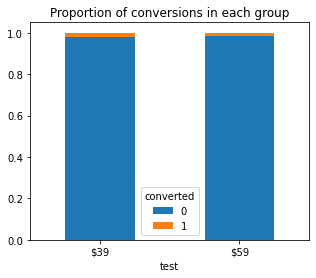

In [33]:
#vertical bar chart
test_results.groupby(["test"])["converted"].value_counts(normalize=True).unstack(
    'converted').plot(kind="bar", stacked=True, figsize=(5,4));
plt.xticks(np.arange(2), ["$39","$59"],rotation=0)
plt.title("Proportion of conversions in each group");

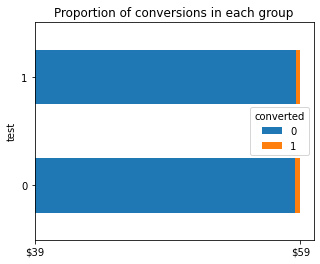

In [34]:
##horizontal bar chart
test_results.groupby(["test"])["converted"].value_counts(normalize=True).unstack(
    'converted').plot.barh(stacked=True, figsize=(5,4));
plt.xticks(np.arange(2), ["$39","$59"],rotation=0)
plt.title("Proportion of conversions in each group");

The less expensive software is more likely to sell, but this might not matter when considering the difference in revenue. <br>

How much money would the company make from 1 user at each price?

In [35]:
# how much money is made? estimated revenue per 1 user
conv1=conv[0,1]
conv2=conv[1,1]

print("Estimated revenue per 1 user made by $39:", 39*conv1) 
print("Estimated revenue per 1 user made by $59:", 59*conv2) 
diff=59*conv2-39*conv1
diff

Estimated revenue per 1 user made by $39: 0.7762409545842438
Estimated revenue per 1 user made by $59: 0.9170180498452746


0.14077709526103077

Are the proportions of converted in each group statistically different?

In [36]:
val_counts = test_results.groupby("test")["converted"].value_counts()
val_counts

test  converted
0     0            198692
      1              4035
1     0            112300
      1              1773
Name: converted, dtype: int64

The proportional of different groups are quite significant different and we need to further explore the relationship.

In [37]:
# This uses a simple normal test for proportions. It should be the
# same as running the mean z-test on the data encoded 
# 1 for event and 0 for no event so that the sum corresponds to the count.

from statsmodels.stats.proportion import proportions_ztest

count = np.array([val_counts[0,1],val_counts[1,1]])
nobs = np.array([val_counts[0,0]+val_counts[0,1],val_counts[1,0]+val_counts[1,1]])
value = .05
stat, pval = proportions_ztest(count, nobs, value,alternative='smaller')
print("pvalue is", pval)
print("statistically significant")

pvalue is 0.0
statistically significant


In [38]:
import statsmodels.api as sm
test_results['intercept']=1
#create two dummy variable for operative sysetm
test_results[['39','59']] = pd.get_dummies(test_results['test'])
test_results.head()

#The logit model is fitted

#create logit model
lm = sm.Logit(test_results['converted'], test_results[['intercept', '39']])  
results = lm.fit()
results.summary()



Optimization terminated successfully.
         Current function value: 0.091355
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               316800
Model:                          Logit   Df Residuals:                   316798
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:                0.001364
Time:                        23:17:33   Log-Likelihood:                -28941.
converged:                       True   LL-Null:                       -28981.
Covariance Type:            nonrobust   LLR p-value:                 6.042e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.1485      0.024   -173.318      0.000      -4.195      -4.102
39             0.2518      0.029      8.761      0.000       0.195       0.308
==============================================================================
"""

In [39]:
#create another logit model
lm1 = sm.Logit(test_results['converted'], test_results[['intercept', '59']])  
results1 = lm1.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.091355
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               316800
Model:                          Logit   Df Residuals:                   316798
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:                0.001364
Time:                        23:17:34   Log-Likelihood:                -28941.
converged:                       True   LL-Null:                       -28981.
Covariance Type:            nonrobust   LLR p-value:                 6.042e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8967      0.016   -245.052      0.000      -3.928      -3.866
59            -0.2518      0.029     -8.761      0.000      -0.308      -0.195
==============================================================================
"""

There is a significant difference in conversion rates found via a z-test.


<span class="mark">Since low price is not closely correlated to the conversion drop. Hence. higher prices in the software should be used. Hence, I suggest the company to increase revenue by higher prices targeting strategies.</span>

## Q2: What attributes of customer behavior influence conversion rate?

In [40]:
# merge user table with results tables
# left merge because there are extra users in the test_results table
merged_df = pd.merge(test_results, user_table, on="user_id", how="left")

In [41]:
merged_df.describe(include="all")

,user_id,timestamp,source,device,operative_system,test,converted,intercept,39,59,city,country,lat,long
count,316800.000000,316466,316800,316800,296461,316800.000000,316800.000000,316800.0,316800.000000,316800.000000,275616,275616,275616.000000,275616.000000
unique,NaN,141147,13,2,4,NaN,NaN,NaN,NaN,NaN,923,1,NaN,NaN
top,NaN,2015-04-12 11:51:16,direct_traffic,mobile,windows,NaN,NaN,NaN,NaN,NaN,New York,USA,NaN,NaN
freq,NaN,12,60307,186471,100976,NaN,NaN,NaN,NaN,NaN,25748,275616,NaN,NaN
mean,499281.341840,NaN,NaN,NaN,NaN,0.360079,0.018333,1.0,0.639921,0.360079,NaN,NaN,37.111680,-93.981772
std,288591.154044,NaN,NaN,NaN,NaN,0.480024,0.134154,0.0,0.480024,0.480024,NaN,NaN,5.209627,18.086486
min,3.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.0,0.000000,0.000000,NaN,NaN,19.700000,-157.800000
25%,249525.750000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.0,0.000000,0.000000,NaN,NaN,33.660000,-112.200000
50%,499021.500000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.0,1.000000,0.000000,NaN,NaN,37.740000,-88.930000
75%,749025.500000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.0,1.000000,1.000000,NaN,NaN,40.700000,-78.910000


In [42]:
# just select meaningful columns for analysis
cols = ["user_id", "timestamp", "source", "device", "operative_system", "test", "converted", "city"]
merged_df = merged_df[cols]

In [43]:
merged_df.head()

,user_id,timestamp,source,device,operative_system,test,converted,city
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,0,Buffalo
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,0,Lakeville
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,0,Parma
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,0,Fayetteville
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,0,Fishers


What was the conversion rate for each source?

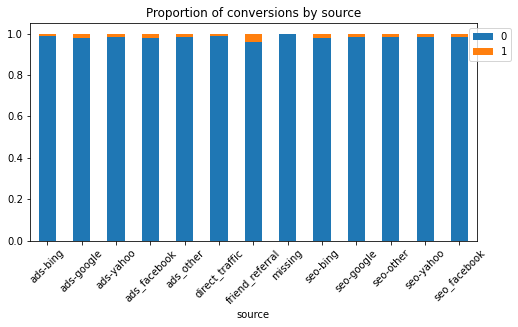

In [44]:
#vertical bar chart
merged_df.groupby(["source"])["converted"].value_counts(normalize=True).sort_values(ascending=False).unstack('converted').plot(kind='bar', stacked=True, figsize=(8,4));
plt.legend(loc='upper center', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=45)
plt.title("Proportion of conversions by source");

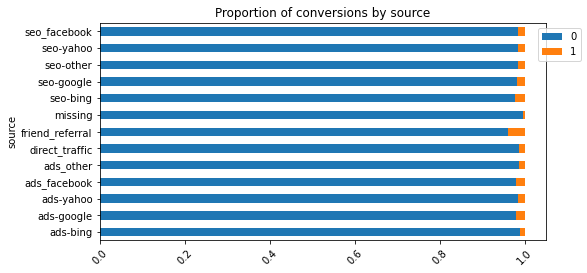

In [45]:
#horizontal bar chart
merged_df.groupby(["source"])["converted"].value_counts(normalize=True).sort_values(ascending=False).unstack('converted').plot.barh(stacked=True, figsize=(8,4));
plt.legend(loc='upper center', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=45)
plt.title("Proportion of conversions by source");

In [46]:
#sort the src in the descending order
src = merged_df.groupby(["source"])["converted"].value_counts(normalize=True).sort_values(ascending=False)

In [47]:
#inspect the top5 converted rate
src[13:18]

source           converted
friend_referral  1            0.038700
seo-bing         1            0.023732
ads-google       1            0.021511
ads_facebook     1            0.021224
seo-google       1            0.017012
Name: converted, dtype: float64

In [48]:
# display conversion rate for each source
print("Ads-bing conversion rate is:", round(src["ads-bing",1]*100,2))
print("Ads-google conversion rate is:", round(src["ads-google",1]*100,2))
print("Ads-yahoo conversion rate is:", round(src["ads-yahoo",1]*100,2))
print("Ads-facebook conversion rate is:", round(src["ads_facebook",1]*100,2))
print("Ads-other conversion rate is:", round(src["ads_other",1]*100,2))
print("Direct traffic conversion rate is:", round(src["direct_traffic",1]*100,2))
print("Friend referral conversion rate is:", round(src["friend_referral",1]*100,2))
print("Seo-bing conversion rate is:", round(src["seo-bing",1]*100,2))
print("Seo-google conversion rate is:", round(src["seo-google",1]*100,2))
print("Seo-other conversion rate is:", round(src["seo-other",1]*100,2))
print("Seo-yahoo conversion rate is:", round(src["seo-yahoo",1]*100,2))
print("Seo-facebook conversion rate is:", round(src["seo_facebook",1]*100,2))
print("Missing conversion rate is:", round(src["missing",1]*100,2))

Ads-bing conversion rate is: 1.2
Ads-google conversion rate is: 2.15
Ads-yahoo conversion rate is: 1.48
Ads-facebook conversion rate is: 2.12
Ads-other conversion rate is: 1.44
Direct traffic conversion rate is: 1.23
Friend referral conversion rate is: 3.87
Seo-bing conversion rate is: 2.37
Seo-google conversion rate is: 1.7
Seo-other conversion rate is: 1.57
Seo-yahoo conversion rate is: 1.62
Seo-facebook conversion rate is: 1.6
Missing conversion rate is: 0.32


<div class="mark">

top 5 sources mainly comes from friend_referral,seo(bing and google) and ads(google and face book).</div><i class="fa fa-lightbulb-o "></i>

For each device, what proportion bought the software? This is the conversion rate/device.

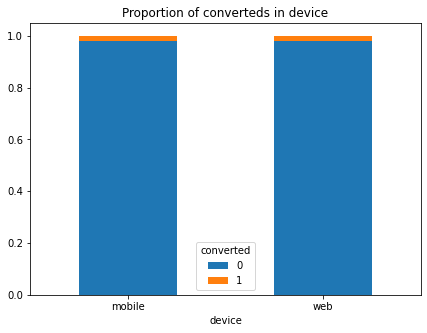

In [49]:
#vertical bar chart
merged_df.groupby(["device"])["converted"].value_counts(normalize=True).unstack('converted').plot(kind='bar', stacked=True, figsize=(7,5));
plt.xticks(rotation=0);
plt.title("Proportion of converteds in device");

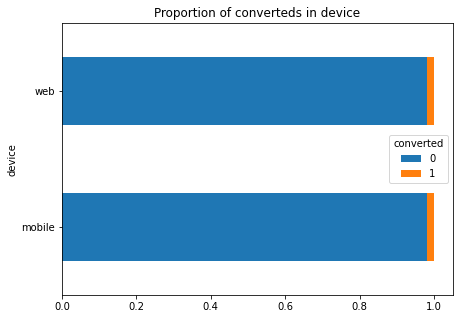

In [50]:
#horizontal bar chart
merged_df.groupby(["device"])["converted"].value_counts(normalize=True).unstack('converted').plot.barh(stacked=True, figsize=(7,5));
plt.xticks(rotation=0);
plt.title("Proportion of converteds in device");

In [51]:
#sort the src in the descending order
device= merged_df.groupby(["device"])["converted"].value_counts(normalize=True).sort_values(ascending=False)

In [52]:
device

device  converted
web     0            0.981984
mobile  0            0.981445
        1            0.018555
web     1            0.018016
Name: converted, dtype: float64

In [53]:
print("Web conversion rate is:", round(device["web",1]*100,3))
print("Mobile conversion rate is:", round(device["mobile",1]*100,3))
diff2=device["mobile",1]-device["web",1]
diff2

Web conversion rate is: 1.802
Mobile conversion rate is: 1.856


0.0005392198096386379

The conversion ratea for web and mobile seem nearly the same.

What kinds of operating systems are users using? Does the conversion rate differ depending on the OS?

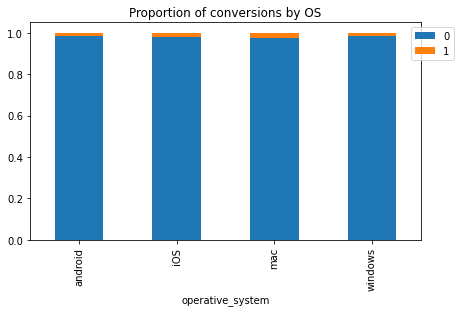

In [54]:
#vertical bar chart
merged_df.groupby(["operative_system"])["converted"].value_counts(normalize=True).unstack('converted').plot(kind='bar', stacked=True, figsize=(7,4));
plt.title("Proportion of conversions by OS")
plt.legend(loc='upper center', bbox_to_anchor=(1.03, 1));

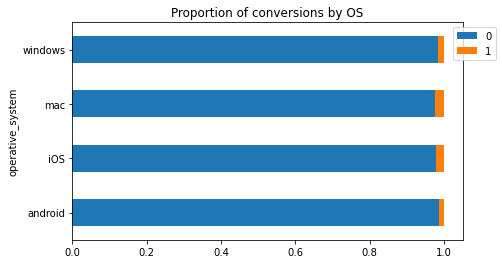

In [55]:
#horizontal bar chart
merged_df.groupby(["operative_system"])["converted"].value_counts(normalize=True).unstack('converted').plot.barh(stacked=True, figsize=(7,4));
plt.title("Proportion of conversions by OS")
plt.legend(loc='upper center', bbox_to_anchor=(1.03, 1));

In [56]:
os_ = merged_df.groupby(["operative_system"])["converted"].value_counts(normalize=True)

In [57]:
os_

operative_system  converted
android           0            0.985067
                  1            0.014933
iOS               0            0.977678
                  1            0.022322
mac               0            0.976002
                  1            0.023998
windows           0            0.983045
                  1            0.016955
Name: converted, dtype: float64

In [58]:
# display conversion rate for each device
print("Android conversion rate is:", round(os_["android",1]*100,2))
print("iOS conversion rate is:", round(os_["iOS",1]*100,2))
print("Mac conversion rate is:", round(os_["mac",1]*100,2))
print("Windows conversion rate is:", round(os_["windows",1]*100,2))

Android conversion rate is: 1.49
iOS conversion rate is: 2.23
Mac conversion rate is: 2.4
Windows conversion rate is: 1.7


<div class="mark">

As for the operative system,mac and ios conversion is quite high while windows and android is much lower which not exceed 2%.</div><i class="fa fa-lightbulb-o "></i>

### Q3: How long should the test have been run for to achieve statistically significant results?

This likely depends on how many users were visiting the site each day - power analysis, sample size estimation. <br>
First calculate the sample size needed:

In [59]:
import statsmodels.stats.api as sms

# effect size for a test comparing two proportions
es = sms.proportion_effectsize(round(conv2,4), round(conv1,4))

# solve for sample size parameter of the power of a two sample z-test
sample_ = sms.NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1)
print("Need a sample size per group of:", round(sample_,0))
print("Need total user sample of:", round(sample_,0)*2)

Need a sample size per group of: 14044.0
Need total user sample of: 28088.0


Now calculate the number of users per day to estimate the total number of days needed

In [60]:
# change to datetime
merged_df["timestamp"] = pd.to_datetime(merged_df.timestamp,format="%Y-%m-%d %H:%M:%S",errors='coerce')

In [61]:
merged_df

,user_id,timestamp,source,device,operative_system,test,converted,city
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,0,Buffalo
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,0,Lakeville
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,0,Parma
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,0,Fayetteville
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,0,Fishers
...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,0,NaN
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,0,Bell Gardens
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,0,West Seneca
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,0,Walnut Creek


In [62]:
# now calculate users per days
t = merged_df.set_index("timestamp")
users_per_day = t.resample("D").user_id.count().mean()
print("Average users per day:", round(users_per_day,2))

Average users per day: 3361.59


In [63]:
# now calculate users per months
t1 = merged_df.set_index("timestamp")
users_per_month = t1.resample("M").user_id.count().mean()
print("Average users per month:", round(users_per_month,2))

Average users per month: 101968.33


In [64]:
print("Total time needed for experiment is:", round(sample_/users_per_day,2), "days")

Total time needed for experiment is: 4.18 days


In [65]:
print("Total time needed for experiment is:", round(sample_/users_per_month,2), "months")

Total time needed for experiment is: 0.14 months


<div class="mark">

The result of users per month is quite similar to user per day.</div><i class="fa fa-lightbulb-o "></i>

<div class="mark">

The total time needed for the experiment is 5 days, but I would recommend longer 14 days due to variations in user activity based on day of the week.</div><i class="fa fa-lightbulb-o "></i>